In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

import data_containers as dc
import traj_planner as tj

from importlib import reload 
reload(dc)
reload(tj)

import utils.qgc_utils as qgc
import trajectory_io as io

reload(qgc)
reload(io)

import pandas as pd
import pymap3d as pm
import numpy as np

In [3]:
#site=dc.Site("./coords/site.json")
#site.set_origin()

site=dc.Site("./coords/2025_12_campaign.json")
site.set_origin()

/home/alessandro/repos/drone_flightplans/data_containers.py:186: UserWarning: No origin provided: assuming the barycenter of all telescopes as origin.
  warnings.warn("No origin provided: assuming the barycenter of all telescopes as origin.", UserWarning)


In [4]:
rtk_correct_position=dc.Geodetic(lat=-22.95977498,
                           lon=-67.78669706,
                           alt=5182.214
                          )
rtk_broadcast_position=dc.Geodetic(lat=-22.9597732,
                           lon=-67.7866847,
                           alt=5173.020
                          )
"""
rtk_broadcast_position=dc.Geodetic(lat=-22.9598362,
                           lon=-67.7864538,
                           alt=5168.080
                          )
"""


'\nrtk_broadcast_position=dc.Geodetic(lat=-22.9598362,\n                           lon=-67.7864538,\n                           alt=5168.080\n                          )\n'

In [6]:
import os
file_names = os.listdir("./litchi_data/")
telescope = "satp1"

for file_name in file_names:
    if file_name.startswith("2025-"):
        
        ld = pd.read_csv("./litchi_data/"+file_name)
        geodetics_uncorr=np.zeros((ld.shape[0],3))
        geodetics_uncorr[:,0] = ld["latitude"]
        geodetics_uncorr[:,1] = ld["longitude"]
        geodetics_uncorr[:,2] = ld["altitude(m)"]+site.landing_site.alt
        
        enu_uncorr = site.geodetic_to_enu(geodetics_uncorr)
        
        enu_rtk_correct = site.geodetic_to_enu(rtk_correct_position)
        enu_rtk_broadcast = site.geodetic_to_enu(rtk_broadcast_position)
        
        offset = enu_rtk_broadcast-enu_rtk_correct
        
        enu_corr = enu_uncorr+offset.as_array()
        geodetic_corr = site.enu_to_geodetic(enu_corr)
        
        ypr = site.observe_points(geodetic_corr, telescope)
        
        out = pd.DataFrame()
        out["az"]=ypr[:,0]
        out["el"]=ypr[:,1]
        out["datetime(utc)"]=ld["datetime(utc)"]
        
        out.to_csv("altaz/"+file_name[:-4]+"_"+telescope+".csv")

(47.0, 53.0)

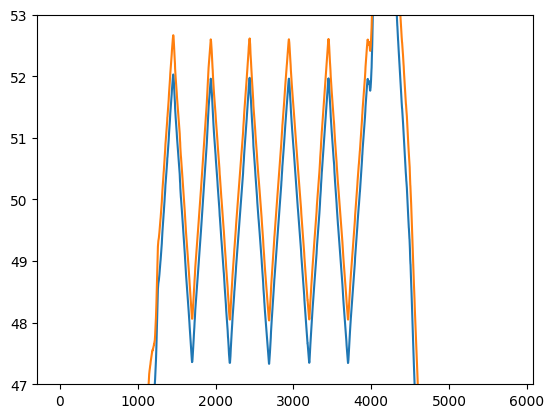

In [39]:
file_name = "2025-11-30_12-13-26_v2"
telescope = "satp1"

ld = pd.read_csv("./litchi_data/"+file_name+".csv")
geodetics_uncorr=np.zeros((ld.shape[0],3))
geodetics_uncorr[:,0] = ld["latitude"]
geodetics_uncorr[:,1] = ld["longitude"]
geodetics_uncorr[:,2] = ld["altitude(m)"]+site.landing_site.alt

enu_uncorr = site.geodetic_to_enu(geodetics_uncorr)

enu_rtk_correct = site.geodetic_to_enu(rtk_correct_position)
enu_rtk_broadcast = site.geodetic_to_enu(rtk_broadcast_position)

offset = enu_rtk_broadcast-enu_rtk_correct

enu_corr = enu_uncorr+offset.as_array()
geodetic_corr = site.enu_to_geodetic(enu_corr)

ypr = site.observe_points(geodetic_corr, telescope)
ypr_uncorr = site.observe_points(geodetics_uncorr, telescope)

out = pd.DataFrame()
out["az"]=ypr[:,0]
out["el"]=ypr[:,1]
out["datetime(utc)"]=ld["datetime(utc)"]

plt.plot(ypr[:,1])
plt.plot(ypr_uncorr[:,1])
plt.ylim(47,53)
#out.to_csv("altaz/"+file_name+"_"+telescope+".csv")

(2000.0, 3000.0)

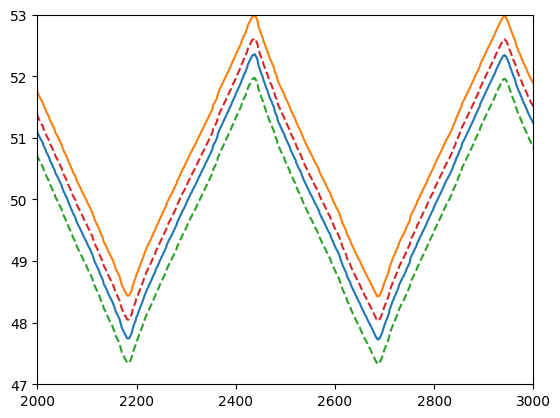

In [40]:
file_name = "2025-11-30_12-13-26_v2"
telescope = "satp1"

ld = pd.read_csv("./litchi_data/"+file_name+".csv")
geodetics_uncorr=np.zeros((ld.shape[0],3))
geodetics_uncorr[:,0] = ld["latitude"]
geodetics_uncorr[:,1] = ld["longitude"]
geodetics_uncorr[:,2] = ld["altitude(m)"]+site2.landing_site.alt

enu_uncorr = site2.geodetic_to_enu(geodetics_uncorr)

enu_rtk_correct = site2.geodetic_to_enu(rtk_correct_position)
enu_rtk_broadcast = site2.geodetic_to_enu(rtk_broadcast_position)

offset = enu_rtk_broadcast-enu_rtk_correct

enu_corr = enu_uncorr+offset.as_array()
geodetic_corr = site2.enu_to_geodetic(enu_corr)

ypr = site2.observe_points(geodetic_corr, telescope)
ypr_uncorr = site2.observe_points(geodetics_uncorr, telescope)

out = pd.DataFrame()
out["az"]=ypr[:,0]
out["el"]=ypr[:,1]
out["datetime(utc)"]=ld["datetime(utc)"]

plt.plot(ypr[:,1])
plt.plot(ypr_uncorr[:,1])
plt.ylim(47,53)
#out.to_csv("altaz/"+file_name+"_"+telescope+".csv")

file_name = "2025-11-30_12-13-26_v2"
telescope = "satp1"

ld = pd.read_csv("./litchi_data/"+file_name+".csv")
geodetics_uncorr=np.zeros((ld.shape[0],3))
geodetics_uncorr[:,0] = ld["latitude"]
geodetics_uncorr[:,1] = ld["longitude"]
geodetics_uncorr[:,2] = ld["altitude(m)"]+site.landing_site.alt

enu_uncorr = site.geodetic_to_enu(geodetics_uncorr)

enu_rtk_correct = site.geodetic_to_enu(rtk_correct_position)
enu_rtk_broadcast = site.geodetic_to_enu(rtk_broadcast_position)

offset = enu_rtk_broadcast-enu_rtk_correct

enu_corr = enu_uncorr+offset.as_array()
geodetic_corr = site.enu_to_geodetic(enu_corr)

ypr = site.observe_points(geodetic_corr, telescope)
ypr_uncorr = site.observe_points(geodetics_uncorr, telescope)

out = pd.DataFrame()
out["az"]=ypr[:,0]
out["el"]=ypr[:,1]
out["datetime(utc)"]=ld["datetime(utc)"]

plt.plot(ypr[:,1], "--")
plt.plot(ypr_uncorr[:,1], "--")
plt.ylim(47,53)
plt.xlim(2000, 3000)
#out.to_csv("altaz/"+file_name+"_"+telescope+".csv")